<a href="https://colab.research.google.com/github/iras-mpark/MLA1020/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from einops import einsum

# Tensor Recap (p. 2)

### Operations on Vectors

In [7]:
x = np.array([0, 1, 10])
x

array([ 0,  1, 10])

In [8]:
# Identity: y[i] = x[i] for all i
y = einsum(x, "i -> i")
y

array([ 0,  1, 10])

In [9]:
# Sum: y += x[i] for all i
y = einsum(x, "i ->")
y

np.int64(11)

In [10]:
# Elementwise product: y[i] = x[i] * x[i] for all i
y = einsum(x, x, "i, i -> i")
y

array([  0,   1, 100])

In [11]:
# Dot product: y += x[i] * x[i] for all i
y = einsum(x, x, "i, i ->")
y

np.int64(101)

In [12]:
# Outer product: y[i][j] = x[i] * x[j] for all i, j
y = einsum(x, x, "i, j -> i j")
y

array([[  0,   0,   0],
       [  0,   1,  10],
       [  0,  10, 100]])

In [13]:
# Triple elementwise product: y[i] = x[i] * x[i] * x[i] for all i
y = einsum(x, x, x, "i, i, i -> i")
y

array([   0,    1, 1000])

In [14]:
# Triple outer product: y[i][j][k] = x[i] * x[j] * x[k] for all i, j, k
y = einsum(x, x, x, "i, j, k -> i j k")
y

array([[[   0,    0,    0],
        [   0,    0,    0],
        [   0,    0,    0]],

       [[   0,    0,    0],
        [   0,    1,   10],
        [   0,   10,  100]],

       [[   0,    0,    0],
        [   0,   10,  100],
        [   0,  100, 1000]]])

### Operations on matrices

In [15]:
x = np.array([1, 2, 3])
s = x.shape
s

(3,)

In [16]:
m = np.array([[0, 1, 2], [1, 10, 0]])
m

array([[ 0,  1,  2],
       [ 1, 10,  0]])

In [17]:
# Sum of all entries: y += m[i][j] for all i, j
y = einsum(m, "i j ->")
y

np.int64(14)

In [18]:
# Row sums: y[i] += m[i][j] for all i, j
y = einsum(m, "i j -> i")
y

array([ 3, 11])

In [19]:
# Column sums: y[j] += m[i][j] for all i, j
y = einsum(m, "i j -> j")
y

array([ 1, 11,  2])

In [20]:
# Transpose: y[j][i] = m[i][j] for all i, j
y = einsum(m, "i j -> j i")
y

array([[ 0,  1],
       [ 1, 10],
       [ 2,  0]])

In [21]:
# Matrix vector product: y[i] = m[i][j] * x[j] for all i, j
y = einsum(m, x, "i j, j -> i")
y

array([ 8, 21])

In [22]:
# Matrix-matrix product m m^T: y[i][j] = m[i][k] * m[j][k] for all i, j, k
y = einsum(m, m, "i k, j k -> i j")
y

array([[  5,  10],
       [ 10, 101]])

In [23]:
# Matrix-matrix product m^T m: y[i][j] = m[k][i] * m[k][j] for all i, j, k
y = einsum(m, m, "k i, k j -> i j")
y

array([[  1,  10,   0],
       [ 10, 101,   2],
       [  0,   2,   4]])

#Linear Regression (p. 5)

### 중학교 문제 (p. 5)

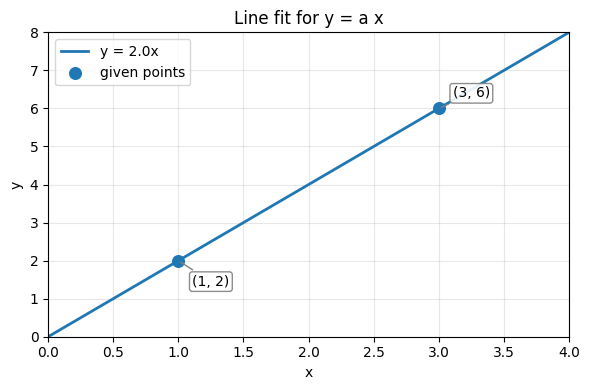

a = 2.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 점 (y, x) -> (x, y)로 변환
points_yx = [(2, 1), (6, 3)]
points_xy = [(x, y) for (y, x) in points_yx]

# 점 분리
x_pts = [p[0] for p in points_xy]  # [1, 3]
y_pts = [p[1] for p in points_xy]  # [2, 6]

# y = a x 에서 기울기 a 계산
a = y_pts[0] / x_pts[0]  # 2.0

# 직선 그리기용 x 범위
x = np.linspace(0, 4, 100)
y = a * x

# 플롯
plt.figure(figsize=(6, 4))
plt.plot(x, y, linewidth=2, label=f"y = {a:.1f}x")
plt.scatter(x_pts, y_pts, s=70, zorder=3, label="given points")

# 점 좌표 라벨 (겹침 방지: 오프셋 + 배경박스)
offsets = [(10, -18), (10, 8)]  # 각 점마다 (x방향, y방향) 픽셀 오프셋
for (xp, yp), (ox, oy) in zip(points_xy, offsets):
    plt.annotate(
        f"({xp}, {yp})",
        xy=(xp, yp),
        xytext=(ox, oy),
        textcoords="offset points",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.9),
        arrowprops=dict(arrowstyle="-", color="gray", lw=1)
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Line fit for y = a x")
plt.xlim(0, 4)
plt.ylim(0, 8)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"a = {a}")

### 중학교 문제로 해결 가능? (p. 6)



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


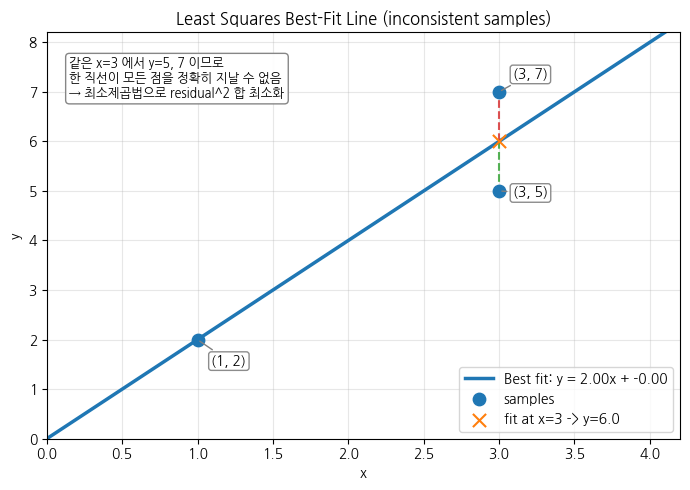

Best-fit line: y = 2.000000x + -0.000000
Predictions: [2. 6. 6.]
Residuals : [ 1.33226763e-15 -1.00000000e+00  1.00000000e+00]
SSE (sum of squared errors) = 2.000000


In [25]:
!apt-get -qq update
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔 폰트 등록 (런타임에 바로 반영되게)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)

# Matplotlib 기본 폰트를 나눔고딕으로 설정
plt.rcParams["font.family"] = "NanumGothic"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# -----------------------------
# 주어진 점 (y, x) -> (x, y)로 변환
# -----------------------------
points_yx = [(2, 1), (5, 3), (7, 3)]
points_xy = [(x, y) for (y, x) in points_yx]

x = np.array([p[0] for p in points_xy], dtype=float)  # [1, 3, 3]
y = np.array([p[1] for p in points_xy], dtype=float)  # [2, 5, 7]

# -----------------------------
# 최소제곱 직선 y = a x + b 구하기
# -----------------------------
A = np.column_stack([x, np.ones_like(x)])   # [x, 1]
a, b = np.linalg.lstsq(A, y, rcond=None)[0]

# 예측값 / residual / SSE
y_hat = a * x + b
residuals = y - y_hat
sse = np.sum(residuals**2)

# -----------------------------
# 그래프용 직선
# -----------------------------
x_line = np.linspace(0, 4.2, 200)
y_line = a * x_line + b

# -----------------------------
# 플롯
# -----------------------------
plt.figure(figsize=(7, 5))

# 최적 직선
plt.plot(x_line, y_line, linewidth=2.5, label=f"Best fit: y = {a:.2f}x + {b:.2f}")

# 점들
plt.scatter(x, y, s=80, zorder=3, label="samples")

# 각 점의 residual(세로 오차) 표시
for xi, yi, ypi in zip(x, y, y_hat):
    plt.plot([xi, xi], [ypi, yi], linestyle="--", linewidth=1.5, alpha=0.8)

# 점 라벨 (겹치지 않게)
offsets = [(10, -18), (10, -4), (10, 10)]
for (xp, yp), (ox, oy) in zip(points_xy, offsets):
    plt.annotate(
        f"({xp:.0f}, {yp:.0f})",
        xy=(xp, yp),
        xytext=(ox, oy),
        textcoords="offset points",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.9),
        arrowprops=dict(arrowstyle="-", color="gray", lw=1)
    )

# x=3에서 직선의 예측점도 표시 (왜 두 점 사이로 가는지 설명용)
x_mid = 3
y_mid = a * x_mid + b
plt.scatter([x_mid], [y_mid], marker="x", s=90, zorder=4, label=f"fit at x=3 -> y={y_mid:.1f}")

# 안내 텍스트 박스
text = (
    "같은 x=3 에서 y=5, 7 이므로\n"
    "한 직선이 모든 점을 정확히 지날 수 없음\n"
    "→ 최소제곱법으로 residual^2 합 최소화"
)
plt.text(
    0.15, 7.7, text,
    fontsize=9,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.95)
)

# 축/스타일
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Best-Fit Line (inconsistent samples)")
plt.xlim(0, 4.2)
plt.ylim(0, 8.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 결과 출력
print(f"Best-fit line: y = {a:.6f}x + {b:.6f}")
print("Predictions:", y_hat)
print("Residuals :", residuals)
print(f"SSE (sum of squared errors) = {sse:.6f}")

In [26]:
# Basic Calculation
x = np.array([[1], [3], [3]])  # input
y = np.array([2, 5, 7])  # 타깃(target)들의 벡터
w = np.array([2])  # 가중치(weights)의 d 벡터


predictions = x @ w   # 곱셈 -> 예측값 n 벡터
residuals = predictions - y   # 원소별 뺄셈 -> 잔차(residual) n 벡터
losses = residuals ** 2  # 원소별 제곱
total_loss = np.sum(losses)  # 모든 원소 합

In [27]:
# Setup basic calculation to Function

def objective(w: np.ndarray) -> float:
    loss = np.sum((x @ w - y) ** 2)
    return loss

In [28]:
# Calculate loss for different Fixed Weights
loss = objective(np.array([1]))
print("Loss when y=x : ", loss)
loss = objective(np.array([2]))
print("Loss when y=2x : ", loss)
loss = objective(np.array([3]))
print("Loss when y=3x : ", loss)


# 궁극적인 목표는 objective(w)를 최소화하는 w를 찾는 것.
# 지금은: 고정된 w가 주어졌을 때, objective(w)의 값은 어떻게 될까? → 더 좋게 (작게) 만들려면 w를 어떻게 변경해야 할까?

Loss when y=x :  21
Loss when y=2x :  2
Loss when y=3x :  21


### 다변수 함수 확장 (p. 7)

In [29]:
x = np.array([[1, 2, 0], [0, -1, 1]])  # n x d 행렬
y = np.array([0, 3])  # 타깃(target)들의 n 벡터
w = np.array([1, 0, 1])  # 가중치(weights)의 d 벡터


predictions = x @ w   # 곱셈 -> 예측값 n 벡터
residuals = predictions - y   # 원소별 뺄셈 -> 잔차(residual) n 벡터
losses = residuals ** 2  # 원소별 제곱
total_loss = np.sum(losses)  # 모든 원소 합

In [30]:
# Setup basic calculation to Function

def objective(w: np.ndarray) -> float:
    loss = np.sum((x @ w - y) ** 2)
    return loss

In [31]:
# Calculate loss for different Fixed Weights
loss = objective(np.array([1, 0, 1]))
print(loss)
loss = objective(np.array([1, 0, -1]))
print(loss)

# 궁극적인 목표는 objective(w)를 최소화하는 w를 찾는 것.
# 지금은: 고정된 w가 주어졌을 때, objective(w)의 값은 어떻게 될까? → 더 좋게 (작게) 만들려면 w를 어떻게 변경해야 할까?

5
17


# Example of Gradient (p. 7)

### 1D → 1D function

In [32]:
# Define 1D → 1D function
def f(x: float) -> float:
  return x ** 2

In [33]:
# -2 <= x <= 2의 범위 내에서 30개의 선형 샘플 추출 → 각 샘플에 대응되는 함수값 y 획득 가능
# []: list type
# {'x':x, 'y':y}: dictionary type
values = [{"x": x, "y": f(x)} for x in np.linspace(-2, 2, 30)]
values

[{'x': np.float64(-2.0), 'y': np.float64(4.0)},
 {'x': np.float64(-1.8620689655172413), 'y': np.float64(3.4673008323424495)},
 {'x': np.float64(-1.7241379310344827), 'y': np.float64(2.9726516052318663)},
 {'x': np.float64(-1.5862068965517242), 'y': np.float64(2.5160523186682524)},
 {'x': np.float64(-1.4482758620689655), 'y': np.float64(2.0975029726516055)},
 {'x': np.float64(-1.3103448275862069), 'y': np.float64(1.7170035671819261)},
 {'x': np.float64(-1.1724137931034484), 'y': np.float64(1.3745541022592156)},
 {'x': np.float64(-1.0344827586206897), 'y': np.float64(1.0701545778834722)},
 {'x': np.float64(-0.896551724137931), 'y': np.float64(0.8038049940546969)},
 {'x': np.float64(-0.7586206896551724), 'y': np.float64(0.5755053507728893)},
 {'x': np.float64(-0.6206896551724137), 'y': np.float64(0.38525564803804985)},
 {'x': np.float64(-0.48275862068965525), 'y': np.float64(0.23305588585017845)},
 {'x': np.float64(-0.3448275862068966), 'y': np.float64(0.11890606420927469)},
 {'x': np.flo

In [34]:
# x를 아주 조금 바꾸면 f(x)는 얼마나 바뀔까?
dx = 1e-4
x = 2
y = f(x)
new_y = f(x + dx)

print("y = ", y)
print("new_y = ", new_y)

# 변화량 dx에 대해 변화량 dy를 관찰.
dy = (new_y - y)
dy_dx = dy / dx
print("dy = ", dy)
print("dy_dx = ", dy_dx)


y =  4
new_y =  4.000400010000001
dy =  0.00040001000000078335
dy_dx =  4.0001000000078335


In [35]:
# dx -> 0이면 이것이 도함수(미분), 해석적으로 계산할 수도 있음:
def df_dx(x: float) -> float:
    return 2 * x

dy_dx = df_dx(x)
dy_dx
# 기하적으로 도함수는 x에서의 접선 기울기(slope)

4

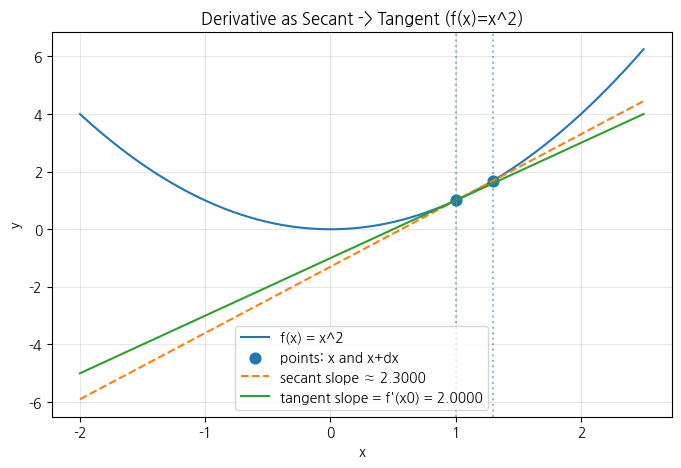

x0 = 1.0, dx = 0.3
(f(x0+dx)-f(x0))/dx = 2.300000
f'(x0) = 2.000000


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 함수와 도함수
def f(x):
    return x**2

def df_dx(x):
    return 2*x

# 기준점
x0 = 1.0
dx = 0.3   # 너무 작게 하면 그림에서 차이가 잘 안 보여서 시각화용으로는 0.2~0.5 정도가 좋아요

# 값 계산
y0 = f(x0)
x1 = x0 + dx
y1 = f(x1)

# 수치 미분(할선 기울기)
slope_secant = (y1 - y0) / dx

# 해석적 미분(접선 기울기)
slope_tangent = df_dx(x0)

# 접선/할선 직선 식
def line(x, x_ref, y_ref, m):
    return y_ref + m * (x - x_ref)

# 그래프용 x축
xs = np.linspace(-2, 2.5, 400)

# 그리기
plt.figure(figsize=(8, 5))
plt.plot(xs, f(xs), label='f(x) = x^2')

# 두 점 표시
plt.scatter([x0, x1], [y0, y1], s=60, label='points: x and x+dx')

# 할선 (x0와 x1를 지나는 직선)
plt.plot(xs, line(xs, x0, y0, slope_secant), '--',
         label=f'secant slope ≈ {slope_secant:.4f}')

# 접선 (x0에서의 접선)
plt.plot(xs, line(xs, x0, y0, slope_tangent),
         label=f'tangent slope = f\'(x0) = {slope_tangent:.4f}')

# 보조선
plt.axvline(x0, linestyle=':', alpha=0.5)
plt.axvline(x1, linestyle=':', alpha=0.5)

plt.title("Derivative as Secant -> Tangent (f(x)=x^2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"x0 = {x0}, dx = {dx}")
print(f"(f(x0+dx)-f(x0))/dx = {slope_secant:.6f}")
print(f"f'(x0) = {slope_tangent:.6f}")

### 2D → 1D function

In [37]:
# 두 개의 스칼라 입력을 받아 스칼라를 출력하는 함수:
def f(x1: float, x2: float) -> float:
  return (x1 + x2) ** 2

y = f(1, 2)
y

9

In [38]:
# 각 입력에 대한 편미분을 해석적으로 계산:
def df_dx1(x1: float, x2: float) -> float:
  return 2 * (x1 + x2) * 1

def df_dx2(x1: float, x2: float) -> float:
  return 2 * (x1 + x2) * 1

dy_dx1 = df_dx1(1, 2)
dy_dx2 = df_dx2(1, 2)
print("dy_dx1 = ", dy_dx1)
print("dy_dx2 = ", dy_dx2)

# (1, 2)에서 (dy_x1, dy_x2) 방향으로 움직이면 f가 가장 크게 증가.
# (1, 2)에서 -(dy_x1, dy_x2) 방향으로 움직이면 f가 가장 크게 감소.

# 그래디언트는 편미분들을 모은 벡터:
#     ∇f = [df/dx[0], df/dx[1]]
print("∇f = ", np.array([dy_dx1, dy_dx2]))

dy_dx1 =  6
dy_dx2 =  6
∇f =  [6 6]


In [39]:
import numpy as np
import plotly.graph_objects as go

# -----------------------------
# 함수 / 그래디언트
# -----------------------------
def f(x1, x2):
    return (x1 + x2) ** 2

def grad_f(x1, x2):
    g = 2 * (x1 + x2)
    return np.array([g, g])  # [df/dx1, df/dx2]

# -----------------------------
# 메인 surface용 격자
# -----------------------------
x1 = np.linspace(-2, 4, 100)
x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# -----------------------------
# 기준점
# -----------------------------
x0, y0 = 1.0, 2.0
z0 = f(x0, y0)

g = grad_f(x0, y0)           # [6, 6]
g_norm = np.linalg.norm(g)   # ||grad||

# 입력 평면에서의 단위 상승 방향
u_xy = g / g_norm

# 표면 위 접선 방향 벡터 (상승/하강)
# z 방향 변화율 = directional derivative = ||grad||
v_up = np.array([u_xy[0], u_xy[1], g_norm])
v_down = -v_up

# 화살표 길이 크게 (더 잘 보이게)
arrow_scale = 0.75
v_up = v_up * arrow_scale
v_down = v_down * arrow_scale

# 시작점/끝점
p0 = np.array([x0, y0, z0])
p_up = p0 + v_up
p_down = p0 + v_down

# -----------------------------
# 접평면 (tangent plane) 패치
# z = f(x0,y0) + grad(x0,y0) · ([x1,x2] - [x0,y0])
# -----------------------------
plane_radius = 1.2  # 점 주변 범위
x1p = np.linspace(x0 - plane_radius, x0 + plane_radius, 30)
x2p = np.linspace(y0 - plane_radius, y0 + plane_radius, 30)
X1p, X2p = np.meshgrid(x1p, x2p)
Zp = z0 + g[0] * (X1p - x0) + g[1] * (X2p - y0)

# -----------------------------
# Plotly figure
# -----------------------------
fig = go.Figure()

# 1) 메인 곡면 (살짝 투명하게 해서 화살표/평면이 잘 보이게)
fig.add_trace(go.Surface(
    x=X1, y=X2, z=Z,
    opacity=0.72,
    showscale=False,
    colorscale="Greys",
    name="surface"
))

# 2) 접평면 (선명한 초록색 + 반투명)
fig.add_trace(go.Surface(
    x=X1p, y=X2p, z=Zp,
    surfacecolor=np.zeros_like(Zp),   # 단색 처리용
    colorscale=[[0, "#00CC66"], [1, "#00CC66"]],
    opacity=0.40,
    showscale=False,
    name="tangent plane"
))

# 3) 기준점 (더 크게/뚜렷하게)
fig.add_trace(go.Scatter3d(
    x=[x0], y=[y0], z=[z0],
    mode='markers',
    marker=dict(size=7, color='black'),
    name='point (1,2)'
))

# 4) 상승 방향 선 (빨강, 두껍게)
fig.add_trace(go.Scatter3d(
    x=[p0[0], p_up[0]],
    y=[p0[1], p_up[1]],
    z=[p0[2], p_up[2]],
    mode='lines',
    line=dict(color='red', width=10),
    name='steepest ascent (+∇f)'
))

# 5) 하강 방향 선 (파랑, 두껍게)
fig.add_trace(go.Scatter3d(
    x=[p0[0], p_down[0]],
    y=[p0[1], p_down[1]],
    z=[p0[2], p_down[2]],
    mode='lines',
    line=dict(color='blue', width=10),
    name='steepest descent (-∇f)'
))

# 6) 상승 방향 화살촉 (빨강 cone, 크게)
fig.add_trace(go.Cone(
    x=[p_up[0]], y=[p_up[1]], z=[p_up[2]],
    u=[v_up[0]], v=[v_up[1]], w=[v_up[2]],
    anchor="tip",
    sizemode="absolute",
    sizeref=0.9,  # 크게
    colorscale=[[0, "red"], [1, "red"]],
    showscale=False,
    name='ascent arrowhead'
))

# 7) 하강 방향 화살촉 (파랑 cone, 크게)
fig.add_trace(go.Cone(
    x=[p_down[0]], y=[p_down[1]], z=[p_down[2]],
    u=[v_down[0]], v=[v_down[1]], w=[v_down[2]],
    anchor="tip",
    sizemode="absolute",
    sizeref=0.9,  # 크게
    colorscale=[[0, "blue"], [1, "blue"]],
    showscale=False,
    name='descent arrowhead'
))

# 8) 보기 좋은 카메라/축
fig.update_layout(
    title="3D Surface + Gradient Arrows + Tangent Plane",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="f(x1,x2)",
        camera=dict(eye=dict(x=1.7, y=1.5, z=1.0)),
        aspectmode="cube"
    ),
    width=950,
    height=700
)

fig.show()

# 정보 출력
print("point =", p0)
print("f(point) =", z0)
print("grad =", g)
print("||grad|| =", g_norm)
print("Tangent plane: z = f(x0,y0) + fx*(x-x0) + fy*(y-y0)")
print(f"             z = {z0:.2f} + {g[0]:.2f}(x-{x0}) + {g[1]:.2f}(y-{y0})")

point = [1. 2. 9.]
f(point) = 9.0
grad = [6. 6.]
||grad|| = 8.48528137423857
Tangent plane: z = f(x0,y0) + fx*(x-x0) + fy*(y-y0)
             z = 9.00 + 6.00(x-1.0) + 6.00(y-2.0)


### 1D~nD → 1D function (임의의 길이의 vector)

In [40]:
# 일반적인 벡터 입력의 경우:
def f(x: np.ndarray):
  return np.sum(x) ** 2

# 2차원 벡터를 입력하고 스칼라를 출력.
y = f(np.array([1, 2]))
y


np.int64(9)

In [41]:
# 차원마다 편미분이 하나씩 존재:
#     df/dx[0]: x[0]를 바꾸면 f가 얼마나 변하는가?
#     df/dx[1]: x[1]를 바꾸면 f가 얼마나 변하는가?

# 그래디언트는 편미분들을 모은 벡터:
#     ∇f = (df/dx[0], df/dx[1])

# 해석적 그래디언트:
def df_dx(x: np.ndarray) -> np.ndarray:
  return 2 * np.sum(x) * np.ones_like(x)

dy_dx = df_dx(np.array([1, 2]))
dy

0.00040001000000078335

In [42]:
# 이 함수들(f, df_dx)은 임의 차원에서도 동작:
y = f(np.array([1, 3, 0, -1]))
print("y = ", y)
dy_dx = df_dx(np.array([1, 3, 0, -1]))
print("df_dx = ", dy_dx)

y =  9
df_dx =  [6 6 6 6]


# Computation Graph (p. 9)

### Basic of Computation graph (p. 10)

In [43]:
# 다음 함수를 위한 계산 그래프를 만들어보자:
def f(x1: float, x2: float) -> float:
  return (x1 + x2) ** 2

In [44]:
# Computation graph용 사용자 함수

class Node: # 각 node (계산 block)은 "자신의 이름(name)"과 "의존성 (dependency)"으로 구성 됨
  """
  A node in the computation graph, which represents some computation of its dependencies.
  Each node has the following:
  - name (just for displaying)
  - dependencies (the nodes that this node depends on)
  - value (computed during the forward pass)
  - grad (computed during the backward pass)
  """
  def __init__(self, name: str, *dependencies):
    self.name = name
    self.dependencies = dependencies
    self.value = None
    self.grad = None
  def forward(self):
    raise NotImplementedError
  def backward(self):
    raise NotImplementedError
  def asdict(self) -> dict:
    result = {
      "name": self.name,
      "value": self.value,
      "grad": self.grad,
    }
    if self.dependencies:
      result["dependencies"] = [dep.asdict() for dep in self.dependencies]
    return result


class Input(Node):
  """Represents an input (leaf node) in the computation graph."""
  def __init__(self, name: str, value: float):
    super().__init__(name)
    self.value = value
  def forward(self):
    # Value is already set
    pass

  def backward(self):
    # No dependencies
    pass

class Add(Node):
  """Add the dependencies."""
  def forward(self):
    x, y = self.dependencies
    self.value = x.value + y.value

  def backward(self):
    x, y = self.dependencies
    x.grad += self.grad
    y.grad += self.grad
class Subtract(Node):
  """Add the dependencies."""
  def forward(self):
    x, y = self.dependencies
    self.value = x.value - y.value

  def backward(self):
    x, y = self.dependencies
    x.grad += self.grad
    y.grad -= self.grad
class Multiply(Node):
  """Multiply the two dependencies."""
  def forward(self):
    x, y = self.dependencies
    self.value = x.value @ y.value

  def backward(self):
    x, y = self.dependencies
    x.grad += self.grad @ y.value.T
    y.grad += x.value.T @ self.grad
class Squared(Node):
  """Raise the first dependency to the power of the second dependency."""
  def forward(self):
    x, = self.dependencies
    self.value = x.value ** 2

  def backward(self):
    x, = self.dependencies
    x.grad += 2 * x.value * self.grad

In [45]:
x1 = Input("x1", np.array(2.0))
print("x1 = ", x1.value)

x2 = Input("x2", np.array(3.0))
print("x2 = ", x2.value)

sum = Add("sum", x1, x2)
print("not yet forwarded sum = ", sum.value)
sum.forward()
print("forwarded sum = ", sum.value)

y = Squared("y", sum)
print("not yet forwarded Squared = ", y.value)
y.forward()
print("forwarded Squared = ", y.value)


# 지금까지의 요약:

#     각 입력(leaf) 노드는 어떤 고정된 값(예: x1)을 나타냄.

#     비-입력 노드는 의존하는 노드들로부터 연산을 수행하는 계산을 나타냄.

#     forward()는 노드의 값을 계산.

#     계산 결과는 루트(root) 노드에 위치(예: y)

# 이제 편미분(예: dy/dx1)을 계산하고 싶다.
# 다변수 미적분의 연쇄법칙(chain rule):

x1 =  2.0
x2 =  3.0
not yet forwarded sum =  None
forwarded sum =  5.0
not yet forwarded Squared =  None
forwarded Squared =  25.0


In [46]:
# dy/dx1을 계산해보자.

#local 도함수 초기화 dy/dy = 1, 그 외는 0
y.grad = np.ones_like(y.value)
print("y.grad = ", y.grad)
sum.grad = np.zeros_like(sum.value)
print("sum.grad = ", sum.grad)
x1.grad = np.zeros_like(x1.value)
print("x1.grad = ", x1.grad)
x2.grad = np.zeros_like(x2.value)
print("x2.grad = ", x2.grad)

y.backward() # backward()는 자신의 downstream node의 grad를 업데이트
print("sum.grad after y.backward = ", sum.grad)
sum.backward()
print("x1.grad after sum backward = ", x1.grad)
print("x2.grad after sum backward = ", x2.grad)

y.grad =  1.0
sum.grad =  0.0
x1.grad =  0.0
x2.grad =  0.0
sum.grad after y.backward =  10.0
x1.grad after sum backward =  10.0
x2.grad after sum backward =  10.0


### Backpropagation (p. 13)

In [47]:
# 이제 역전파 알고리즘을 일반 형태로 정의해보자.
#   입력(leaf)에서 루트까지 그래프를 순회하며 forward 호출
#   루트에서 입력(leaf)까지 역방향으로 순회하며 backward 호출.
def topological_sort(node: Node) -> list[Node]:
  """
  node와 그 의존성(의존성의 의존성 포함)을 위상정렬(topological order)로 반환.
  각 노드는 자신의 dependencies 뒤에 오도록 정렬됨.
  """
  visited: set[int] = set()
  result: list[Node] = []

  def traverse(node: Node):
    if id(node) in visited:
      return
    visited.add(id(node))
    for dep in node.dependencies:
      traverse(dep)
    result.append(node)

  traverse(node)
  return result

def backpropagation(root: Node):
  # root의 모든 재귀적 의존 노드들을 순회 가능한 순서로 모음
  nodes = topological_sort(root)
  order = [node.name for node in nodes]
  print("Nodes sort result: ", order, sep="")

  # Forward pass
  for node in nodes:
    node.forward()
    print(node.name, ".value = \n", node.value, sep="")

  # 모든 그래디언트를 0으로 초기화
  for node in nodes:
    node.grad = np.zeros_like(node.value)

  # ...단, 루트는 1로 시작(출력에 대한 출력의 미분 = 1)
  root.grad = np.ones_like(root.value)

  # # Backward pass
  for node in reversed(nodes):
    node.backward()
    for dep in node.dependencies:
      print(f"{dep.name}.grad after {node.name}.backward =\n{dep.grad}")

  print("\n")


In [48]:
# 앞의 함수를 다시 해보자.
x1 = Input("x1", np.array(2.0))
x2 = Input("x2", np.array(3.0))
sum = Add("sum", x1, x2)
y = Squared("y", sum)
print("**Simple example**")
backpropagation(y)

#처음의 동기 예제(선형 회귀)로 돌아가보자.
print("**Linear regression**")
x = Input("x", np.array([[1., 2, 0], [0, -1, 1]]))
y = Input("y", np.array([[0.], [3]]))
w = Input("w", np.array([[1.], [0], [1]]))
predictions = Multiply("predictions", x, w)
residuals = Subtract("residuals", predictions, y)
losses = Squared("losses", residuals)
ones = Input("ones", np.ones((1, 2)))
total_loss = Multiply("total_loss", ones, losses)
backpropagation(total_loss)

**Simple example**
Nodes sort result: ['x1', 'x2', 'sum', 'y']
x1.value = 
2.0
x2.value = 
3.0
sum.value = 
5.0
y.value = 
25.0
sum.grad after y.backward =
10.0
x1.grad after sum.backward =
10.0
x2.grad after sum.backward =
10.0


**Linear regression**
Nodes sort result: ['ones', 'x', 'w', 'predictions', 'y', 'residuals', 'losses', 'total_loss']
ones.value = 
[[1. 1.]]
x.value = 
[[ 1.  2.  0.]
 [ 0. -1.  1.]]
w.value = 
[[1.]
 [0.]
 [1.]]
predictions.value = 
[[1.]
 [1.]]
y.value = 
[[0.]
 [3.]]
residuals.value = 
[[ 1.]
 [-2.]]
losses.value = 
[[1.]
 [4.]]
total_loss.value = 
[[5.]]
ones.grad after total_loss.backward =
[[1. 4.]]
losses.grad after total_loss.backward =
[[1.]
 [1.]]
residuals.grad after losses.backward =
[[ 2.]
 [-4.]]
predictions.grad after residuals.backward =
[[ 2.]
 [-4.]]
y.grad after residuals.backward =
[[-2.]
 [ 4.]]
x.grad after predictions.backward =
[[ 2.  0.  2.]
 [-4.  0. -4.]]
w.grad after predictions.backward =
[[ 2.]
 [ 8.]
 [-4.]]




# Linear regression (p. 15)

In [62]:
# 입력(Input): 공부한 시간 (예: 3)
# 출력(Output): 시험 점수 (예: 70)
# 예측기(predictor)는 입력을 받아 출력을 만드는 함수
# Example
def fixed_f(x: float) -> float:
  y = 20 * x + 10
  return y

# 입력 x를 넣으면, 예측기를 호출해서 출력 y를 얻을 수 있음
x1 = 1.0  # Input
y1 = fixed_f(x1)  # Output
print("x1 = ", x1, sep="")
print("y1 = ", y1, sep="")

x2 = 3.0  # Input
y2 = fixed_f(x2)  # Output
print("x2 = ", x2, sep="")
print("y2 = ", y2, sep="")

x1 = 1.0
y1 = 30.0
x2 = 3.0
y2 = 70.0


In [64]:
import altair as alt

# 1. 데이터 생성
values = [{"x": x, "y": fixed_f(x)} for x in np.linspace(0.0, 5.0, 30)]

# 2. Altair 차트 생성
chart = alt.Chart(alt.Data(values=values)).mark_line().encode(
    x="x:Q",
    y="y:Q"
)

chart

alt.Chart(...)